# 01_article_analysis

Warning message in dir.create(write_output_base_path):
“cannot create dir 'output/reproduc', reason 'No such file or directory'”Loading required package: colorout
Loading required package: assertthat
Loading required package: staggefuncs
Loading required package: tidyverse
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.2     ✔ dplyr   0.7.4
✔ tidyr   0.8.0     ✔ stringr 1.2.0
✔ readr   1.1.1     ✔ forcats 0.2.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()    masks stats::filter()
✖ tibble::has_name() masks assertthat::has_name()
✖ dplyr::lag()       masks stats::lag()
Loading required package: colorblindr
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘colorblindr’”

named list()

named list()

Warning message in `[<-.factor`(`*tmp*`, ri, value = c(NA, NA, NA, NA, 4017071L, :
“invalid factor level, NA generated”Loading required package: colorspace
Loading required package: tspmeta
Loading required package: TSP
Loading required package: MASS

Attaching package: ‘MASS’

The following object is masked from ‘package:dplyr’:

    select



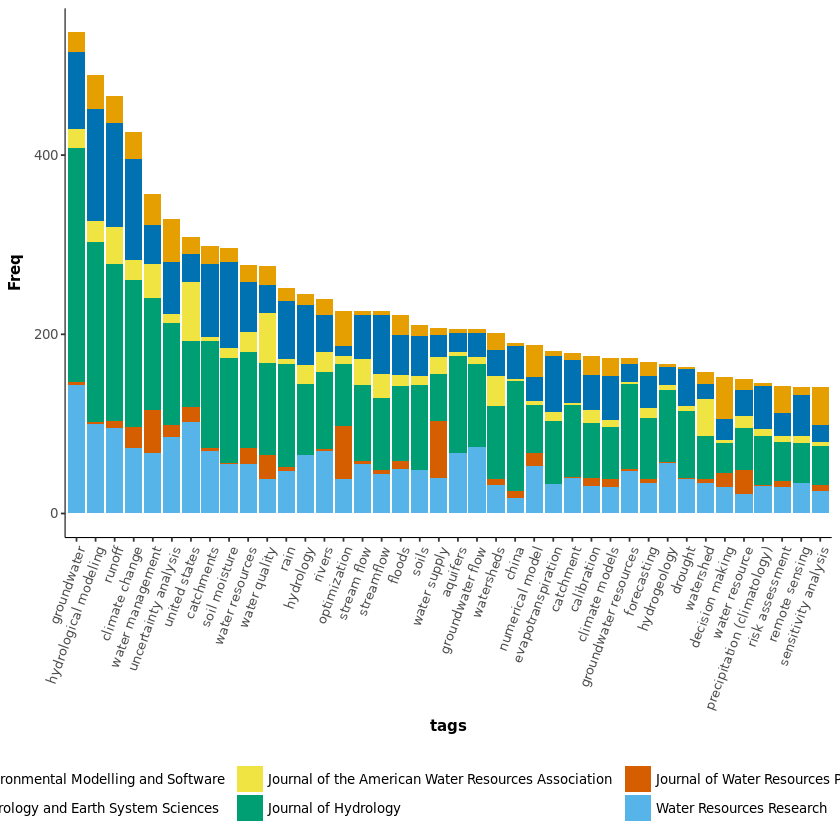

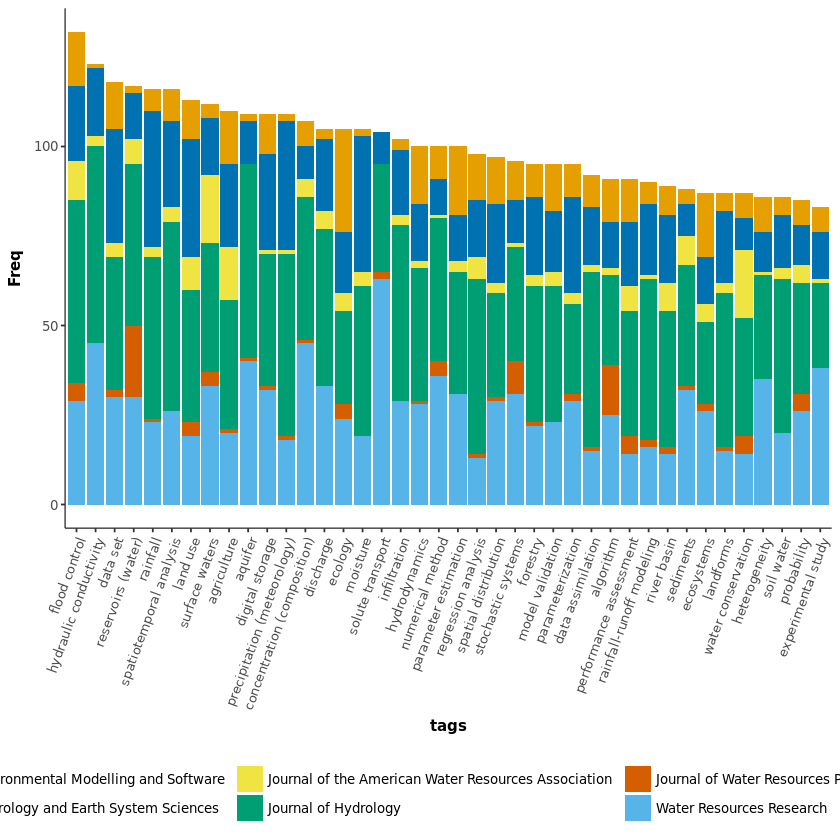

term,keyword_n,abstract_n
analyticalsoftware,1,0
applicationprograms,4,0
c(programminglanguage),0,1
c\+,2,2
cloudcomputing,4,3
computationalreproducibility,1,0
computermodeling,2,0
computerprogramming,5,0
computersoftware,28,0
computersoftwarereusability,2,0


[1] 120

[1]    7    9   12   21   22   24   25   29   30   31   32   34   39   43   48
 [16]   50   59   60   61   62   70   71   75   77   80   82   85   89   91   95
 [31]   98  110  111  112  113  114  118  119  123  130  142  143  158  187  188
 [46]  208  213  217  226  239  240  295  355  379  384  473  500  523  578  582
 [61]  618  631  638  639  649  668  718  720  735  797  816  869  872  914  918
 [76]  938  960  961  973  974 1036 1049 1054 1067 1154 1172 1200 1255 1308 1406
 [91] 1408 1411 1421 1426 1434 1443 1453 1472 1479 1499 1507 1550 1606 1682 1717
[106] 1727 1731 1780 1799 1808 1832 1833 1834 1850 1863 1884 1899 1910 1954 1955

Warning message in dir.create(file.path(write_output_base_path, "articles/")):
“cannot create dir 'output/reproduc/articles', reason 'No such file or directory'”Warning message in file(file, ifelse(append, "a", "w")):
“cannot open file 'output/reproduc/articles/pub_summary_table.csv': No such file or directory”

ERROR: Error in file(file, ifelse(append, "a", "w")): cannot open the connection


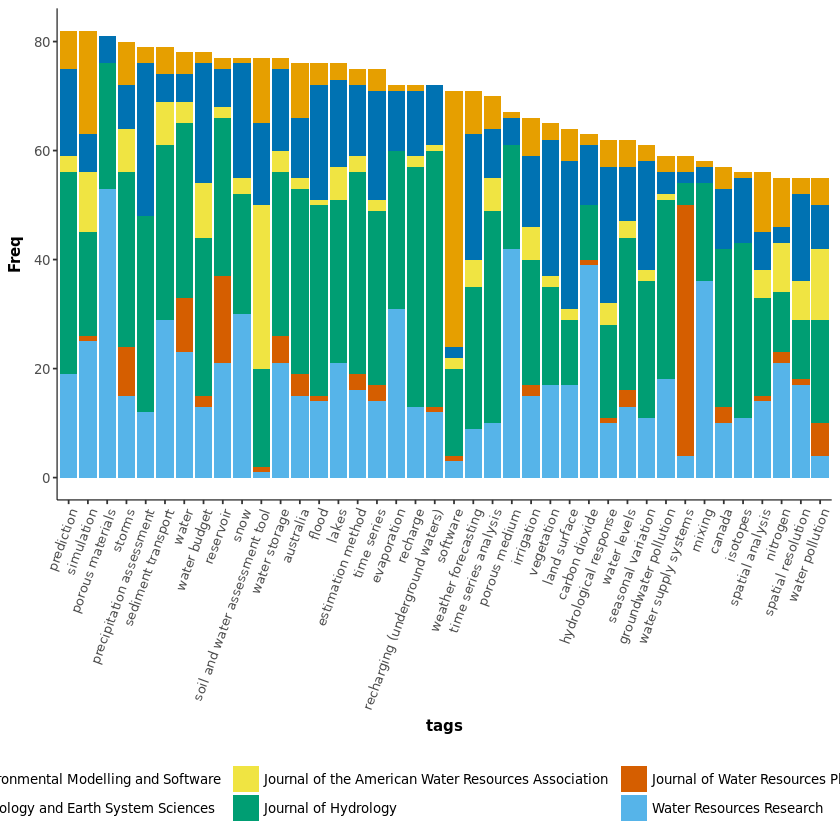

In [1]:
# *------------------------------------------------------------------
# | PROGRAM NAME: 03_ap_model_fit
# | FILE NAME: 03_ap_model_fit.R
# | DATE: 
# | CREATED BY:  Jim Stagge         
# *----------------------------------------------------------------
# | PURPOSE:  This is a code wrapper to fit the Annual Percentile (AP) model.
# | It fits cumulative probability distributions for annual and monthly flows.
# |
# |
# *------------------------------------------------------------------
# | COMMENTS:               
# |
# |  1:  
# |  2: 
# |  3: 
# |*------------------------------------------------------------------
# | DATA USED:               
# | USGS gauge flow data
# | Annual reconstructions from:
# | Allen, E.B., Rittenour, T.M., DeRose, R.J., Bekker, M.F., Kjelgren, R., Buckley, B.M., 2013. A tree-ring based reconstruction of Logan River streamflow, northern Utah. Water Resources Research 49, 8579–8588. doi:10.1002/2013WR014273.
# |
# | DeRose, R.J., Bekker, M.F., Wang, S.Y., Buckley, B.M., Kjelgren, R.K., Bardsley, T., Rittenour, T.M., Allen, E.B., 2015. A millennium-length reconstruction of Bear River stream flow, Utah. Journal of Hydrology 529, Part 2, 524–534. doi:10.1016/j.jhydrol.2015.01.014.
# |
# |*------------------------------------------------------------------
# | CONTENTS:               
# |
# |  PART 1:  
# |  PART 2: 
# |  PART 3: 
# *-----------------------------------------------------------------
# | UPDATES:               
# |
# |
# *------------------------------------------------------------------

### Clear any existing data or functions.
rm(list=ls())

###########################################################################
## Set the Paths
###########################################################################
### Path for Data and Output	
data_path <- "data"
output_path <- "output"

global_path <- "../global_func"
function_path <- "./functions"

### Set output location
output_name <- "reproduc"
write_output_base_path <- file.path(output_path, output_name)

dir.create(write_output_base_path)

### Set input location
data_path<- file.path(data_path)

###########################################################################
###  Load functions
###########################################################################
### Load these functions for all code
require(colorout)
require(assertthat)
require(staggefuncs)
require(tidyverse)
require(colorblindr)

### Load these functions for this unique project
require(stringr)

### Load project specific functions
file.sources = list.files(function_path, pattern="*.R", recursive=TRUE)
sapply(file.path(function_path, file.sources),source)

### Load global functions
file.sources = list.files(global_path, pattern="*.R", recursive=TRUE)
sapply(file.path(global_path, file.sources),source)


###########################################################################
## Read in Data
###########################################################################
### Read in article data
ems_df <- read.csv(file.path(data_path, "articles/ems_2017.csv"))
hess_df <- read.csv(file.path(data_path, "articles/hess_2017.csv"))
jawra_df <- read.csv(file.path(data_path, "articles/jawra_2017.csv"))
joh_df <- read.csv(file.path(data_path, "articles/joh_2017.csv"))
jwrpm_df <- read.csv(file.path(data_path, "articles/jwrpm_2017.csv"))
wrr_df <- read.csv(file.path(data_path, "articles/wrr_2017.csv"))

###########################################################################
## Combine into single dataframe
###########################################################################
all_journals_df <- rbind(ems_df, hess_df, jawra_df, joh_df, jwrpm_df, wrr_df)
journal_names <- levels(all_journals_df$Publication.Title)


###########################################################################
## Read through all tags and create a table
###########################################################################
for (i in seq(1, length(journal_names))){

	journal_i <- journal_names[i]
	journal_subset <-  all_journals_df[all_journals_df$Publication.Title==journal_i,]

	### Extract tags
	tags_i <- journal_subset$Manual.Tags
	### Separate list organized by semicolons
	tags_i <- unlist(sapply(tags_i, function(x){strsplit(as.character(x), split="; ")}))
	### Shift everything to lower case
	tags_i <- tolower(tags_i)

	### First time through loop, create full data frame, all other times bind to bottom
	tag_i_df <- data.frame(journal=journal_i, tags=tags_i)
	if (i == 1){
		tags_df <- tag_i_df
	} else {
		tags_df <- rbind(tags_df, tag_i_df)
	}	
}

tags_table <- as.data.frame(table(tags_df$tags))
tags_by_journal <- as.data.frame(table(tags_df))

tag_test <- tags_table$Var1[tags_table$Freq > 250]

tag_sort <- tags_table$Var1[order(tags_table$Freq, decreasing=TRUE)]


#12,976 total tags


###########################################################################
## Plot tags frequency
###########################################################################

journal_colors <- cb_pal(6)

plot_df <- tags_by_journal[tags_by_journal$tags %in% tag_sort[1:40],]
plot_df$tags <- factor(plot_df$tags, levels=tag_sort)

p <- ggplot(plot_df, aes(x=tags, y=Freq))
p <- p + geom_bar(aes(fill = journal), position="stack", stat="identity")
p <- p + theme_classic_new()
p <- p + scale_fill_manual(name="Journal", values=journal_colors)
p <- p + theme(legend.position="bottom")
p <- p + theme(axis.text.x = element_text(angle = 70, hjust = 1))
p

ggsave("tags_1-40.pdf",  p, width=8, height=5)



plot_df <- tags_by_journal[tags_by_journal$tags %in% tag_sort[41:80],]
plot_df$tags <- factor(plot_df$tags, levels=tag_sort)

p <- ggplot(plot_df, aes(x=tags, y=Freq))
p <- p + geom_bar(aes(fill = journal), position="stack", stat="identity")
p <- p + theme_classic_new()
p <- p + scale_fill_manual(name="Journal", values=journal_colors)
p <- p + theme(legend.position="bottom")
p <- p + theme(axis.text.x = element_text(angle = 70, hjust = 1))
p

ggsave("tags_41-80.pdf",  p, width=8, height=5)



plot_df <- tags_by_journal[tags_by_journal$tags %in% tag_sort[81:120],]
plot_df$tags <- factor(plot_df$tags, levels=tag_sort)

p <- ggplot(plot_df, aes(x=tags, y=Freq))
p <- p + geom_bar(aes(fill = journal), position="stack", stat="identity")
p <- p + theme_classic_new()
p <- p + scale_fill_manual(name="Journal", values=journal_colors)
p <- p + theme(legend.position="bottom")
p <- p + theme(axis.text.x = element_text(angle = 70, hjust = 1))
p

ggsave("tags_81-120.pdf",  p, width=8, height=5)


#strsplit(as.character(ems_tags[[10]]), split="; ")

#all_journals_df[ grep("algorithm", as.character(all_journals_df$Manual.Tags)),]

#all_journals_df[ grep('software', as.character(all_journals_df$Manual.Tags)),]

#yup <- gsub("[[:space:]]", "", as.character(all_journals_df$Manual.Tags))
#yup <- tolower(yup)

#all_journals_df[grep('analyticalsoftware', yup),]

#all_journals_df$Abstract.Note

#grep('github', as.character(all_journals_df$Abstract.Note))
 
#yup <- tolower(as.character(all_journals_df$Abstract.Note))
#yup <- gsub("[[:space:]]", "", yup)
#all_journals_df[grep('opensource', yup),]

  
#############################################################################
# as.character(all_journals_df$Manual.Tags)
# "software",

###########################################################################
## Redo the whole analysis with something else (come back and check)
###########################################################################
#### Set an index column to use for all calculations
all_journals_df$index <- seq(1,dim(all_journals_df)[1])
 
term_list <- c("analyticalsoftware", "applicationprograms", "c(programminglanguage)", "c\\+", "cloudcomputing", "computationalreproducibility", "computermodeling", "computerprogramming", "computersoftware", "computersoftwarereusability", "computer-basedmodels", "developmentandtesting", "engineeringsoftware", "fortran", "freelyavailabledata","freelyavailablesoftware", "github", "hardwareandsoftware", "java", "opencode", "opensource", "replicativevalidation", "scientificsoftware", "code", "python", "cran", "http")

abstract_list <- tolower(as.character(all_journals_df$Abstract.Note))
abstract_list <- gsub("[[:space:]]", "", abstract_list)

keyword_list <- tolower(as.character(all_journals_df$Manual.Tags))
keyword_list <- gsub("[[:space:]]", "", keyword_list)

for (i in seq(1,length(term_list))){
	term_i <- term_list[i]
	
	abstract_i <- grep(term_i, abstract_list)
	keyword_i <- grep(term_i, keyword_list)
	
	length_abstract <- length(abstract_i)
	length_keyword <- length(keyword_i)
	
	index_i <- sort(unique(c(abstract_i, keyword_i)))
	
	results_i <- data.frame(term=term_i, keyword_n=length_keyword, abstract_n=length_abstract)
	
	if (i == 1){
		results_df <- results_i
		index_all <- index_i 
	} else {
		results_df <- rbind(results_df, results_i)
		index_all <- sort(unique(c(index_all, index_i)))
	}
}

	length_all <- length(index_all)


results_df
length_all

index_all


###########################################################################
## Cut based on keywords
###########################################################################
keyword_subset <- all_journals_df[index_all,]

nonkeyword_index <- all_journals_df$index[ !(all_journals_df$index %in% index_all)]
nonkeyword_subset <- all_journals_df[nonkeyword_index,]

###########################################################################
## Summarize based on keywords and journal
###########################################################################
#table(keyword_subset$Publication.Title)
#table(nonkeyword_subset$Publication.Title)

pub_table <- cbind(table(keyword_subset$Publication.Title),
table(nonkeyword_subset$Publication.Title), table(all_journals_df$Publication.Title))

pub_table <- data.frame(journal = rownames(pub_table), pub_table)
rownames(pub_table) <- as.character(seq(1,dim(pub_table)[1]))
pub_table <- pub_table %>% 
	rename(keyword = X1, none = X2, total = X3)
	
pub_table$journal_abbrev <- c("EM&S", "HESS", "JAWRA", "JoH", "JWRP&M", "WRR" )

###########################################################################
## Write publication summary table
###########################################################################
dir.create(file.path(write_output_base_path, "articles/"))

write_file <- file.path(write_output_base_path, "articles/pub_summary_table.csv")
write.csv(pub_table, write_file)

  
###########################################################################
## Prepare to randomly sample
###########################################################################

common_ratio_est <- round((pub_table[,4]/sum(pub_table[,4]))*360)
common_ratio_est

corrected_ratio_est <- common_ratio_est
corrected_ratio_est[1] <- 49+15 #49 in keywords, make sure at least 15 random
corrected_ratio_est[3] <- 30  ### Minimum of 30 articles
corrected_ratio_est[5] <- 30  ### Minimum of 30 articles
sum(corrected_ratio_est)
corrected_ratio_est
360 - sum(corrected_ratio_est)

corrected_ratio_est[2] <- corrected_ratio_est[2] - 8
corrected_ratio_est[4] <- corrected_ratio_est[4] - 18
corrected_ratio_est[6] <- corrected_ratio_est[6] - 15

sum(corrected_ratio_est)

required_nonkeyword <- corrected_ratio_est - pub_table[,2]

for (j in seq(1,length(required_nonkeyword))){
	
	 pub_test <- nonkeyword_subset$Publication.Title %in% names(required_nonkeyword)[j]
	 pubs_j <- nonkeyword_subset$index[pub_test]
	 
	sample_j <- sample(pubs_j, size=required_nonkeyword[j], replace = FALSE)
	
	if(j ==1){
		sample_nonkeyword <- sample_j
	} else {
		sample_nonkeyword <- c(sample_nonkeyword, sample_j)
	}
	
}	 
	
sample_nonkeyword <- sort(sample_nonkeyword)


write.csv( index_all, "sampled_keywords.csv")
write.csv( sample_nonkeyword, "sampled_nonkeywords.csv")

sampled_indices <- c(index_all, sample_nonkeyword)
write.csv( sampled_indices, "sampled_indices.csv")

### Assign reviewers
reviewers <- c("Adel", "David","Hadia", "Jim", "Nour", "Ryan")

### Randomly sorted publications
random_indices <- sample(sampled_indices)


paper_assign <- data.frame(Reviewer=rep(reviewers, each=60))
paper_assign$index <- random_indices
paper_assign$DOI <- all_journals_df$DOI[random_indices]
paper_assign$URL <- paste0("https://doi.org/", paper_assign$DOI)
paper_assign$Citation <- paste0(all_journals_df$Author[random_indices], ' (', all_journals_df$Publication.Year[random_indices], ') ', all_journals_df$Title[random_indices], '. ', all_journals_df$Publication.Title[random_indices], '. ', all_journals_df$Volume[random_indices], ', ', all_journals_df$Pages[random_indices],'.')
paper_assign$Journal <- as.character(all_journals_df$Publication.Title[random_indices])

paper_assign <- with(paper_assign, paper_assign[order(Reviewer, index),])

write.csv(paper_assign, "paper_assign_github.csv", row.names=FALSE)


